In [163]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
import glob
from grad_cam import make_attention_map
from preprocess import PreprocessImage
from torchvision import models
from utils import *
from classifier import *
import torch
from torch import nn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid", {'grid.linestyle': '--'})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
model16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [24]:
paths = glob.glob('/home/data/ForDeep/ImageNet/validation/*.JPEG')

In [135]:
def get_acc(y, t):
    return np.equal(t, y).astype(int).sum()/len(t)

In [148]:
log = np.loadtxt('../data/outputs/log.txt')

In [149]:
len(log)

100

In [150]:
org_class, normal_pred, aug_pred = log.T

In [151]:
acc = [get_acc(org_class, normal_pred), get_acc(org_class, aug_pred)]

In [162]:
acc

[0.69, 0.66]

Text(0,0.5,'Accuracy')

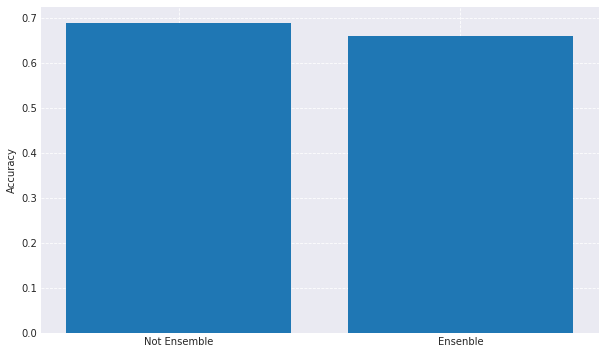

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.bar([0, 1], acc)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Not Ensemble', 'Ensenble'])
ax.set_ylabel('Accuracy')

In [143]:
log = np.loadtxt('../data/outputs/log_0445.txt')

In [144]:
pred_class, org_class, adv_class, conf, normal_pred = log.T

In [145]:
acc = [get_acc(org_class, pred_class), get_acc(org_class, adv_class), get_acc(org_class, normal_pred)]

In [146]:
acc

[0.366, 0.002, 0.72]

<BarContainer object of 3 artists>

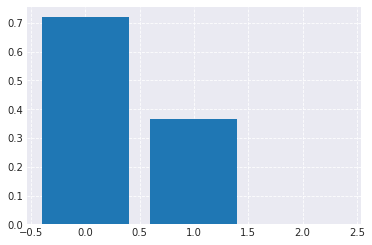

In [147]:
fig, ax = 
plt.bar([0, 1, 2], [0.72, 0.366, 0])

In [119]:
np.equal(org_class, pred_class).astype(int).sum()/500

0.366

In [120]:
conf[np.equal(org_class, pred_class)].mean()

0.4384005270603169

In [121]:
conf.mean()

0.48121203502081333

In [93]:
org_class

array([658., 684., 853., 261., 564., 104., 110., 367., 553., 367., 474.,
       648.,  69., 729., 294., 114., 710., 373.,  59., 829., 355., 430.,
       120., 465., 475., 722., 115., 961., 183., 559., 626., 416., 166.,
       253., 776., 530., 513., 927., 898., 659., 570., 210., 566., 310.,
       372., 524., 799., 260., 454., 526., 826., 493., 574., 741., 152.,
       690., 974., 989., 432., 536., 449., 993., 807., 136., 593., 906.,
       942., 728.,  84., 231., 907., 613.,  64.,  18., 477., 382., 634.,
       554., 545., 920., 879., 384., 365., 588., 171., 180., 654., 194.,
       429., 468.,   0.,  92.,  99., 270., 414., 503., 955., 758., 844.,
       112., 141., 706., 441., 604., 972., 964., 955.,  88., 712., 982.,
       898., 770., 509., 561., 876., 787., 980.,  27., 455., 155., 842.,
        44., 348., 451., 693., 989., 435., 969., 714., 179., 418., 671.,
       828.,  82., 222., 678., 689., 573., 559., 668., 356., 224., 741.,
       478., 144., 817., 704., 869., 805., 624.])

In [92]:
pred_class

array([824., 562., 562., 261., 741., 562., 110., 489., 707., 741., 474.,
       741.,  69., 741., 294., 815., 893., 562., 646., 829., 355., 430.,
       741., 562., 475., 611., 115., 640., 741., 562., 562., 562., 166.,
       253., 562., 409., 904., 441., 646., 760., 815., 611., 741., 310.,
       562., 611., 741., 260., 562., 611., 916., 741., 574., 562., 562.,
       562., 974., 989., 432., 975., 425., 815., 611., 136., 562., 611.,
       942.,  84.,  84., 741., 440., 613.,  59., 272., 477.,  84., 646.,
       554., 545., 920., 879., 384., 365., 562., 171., 562., 654., 194.,
       429., 530., 646.,  92., 562., 270., 880., 562., 787., 611., 844.,
       611., 141., 611., 441., 604., 611., 980., 107., 489., 549., 562.,
       818., 741., 741., 561., 921., 741., 975.,  27., 455., 562., 741.,
       562., 327., 451., 693., 990., 562., 815., 539., 179., 741., 562.,
       632.,  82., 222., 741., 601., 573., 559., 562., 741., 611., 562.,
       741., 144., 581., 741., 562., 920., 562.])

In [67]:
a = 1
b = 0

In [63]:
np.equal(a, b, dtype=int)

True

In [68]:
int(a == b)

0

In [46]:
a

array([['IL', '65'],
       ['IL', '97'],
       ['IL', '23'],
       ...,
       ['IL', '23'],
       ['IL', '98'],
       ['IL', '35']], dtype='<U2')

In [74]:
a = np.loadtxt('../data/val.txt', dtype=str)

In [82]:
b = np.loadtxt('../data/outputs/log.txt')

In [85]:
len(b)

2

In [77]:
? np.random.choice()

In [79]:
ind = np.random.randint(0, len(a), 100)

In [80]:
a[ind]

array([['ILSVRC2012_val_00003912.JPEG', '858'],
       ['ILSVRC2012_val_00028263.JPEG', '326'],
       ['ILSVRC2012_val_00009364.JPEG', '682'],
       ['ILSVRC2012_val_00009338.JPEG', '185'],
       ['ILSVRC2012_val_00013068.JPEG', '775'],
       ['ILSVRC2012_val_00030525.JPEG', '757'],
       ['ILSVRC2012_val_00043606.JPEG', '826'],
       ['ILSVRC2012_val_00029654.JPEG', '90'],
       ['ILSVRC2012_val_00000321.JPEG', '508'],
       ['ILSVRC2012_val_00005616.JPEG', '157'],
       ['ILSVRC2012_val_00028929.JPEG', '345'],
       ['ILSVRC2012_val_00049261.JPEG', '898'],
       ['ILSVRC2012_val_00046440.JPEG', '57'],
       ['ILSVRC2012_val_00011011.JPEG', '96'],
       ['ILSVRC2012_val_00021152.JPEG', '301'],
       ['ILSVRC2012_val_00013254.JPEG', '942'],
       ['ILSVRC2012_val_00028028.JPEG', '2'],
       ['ILSVRC2012_val_00049224.JPEG', '131'],
       ['ILSVRC2012_val_00006558.JPEG', '484'],
       ['ILSVRC2012_val_00026167.JPEG', '275'],
       ['ILSVRC2012_val_00019094.JPEG', '186'

In [72]:
def show_progress(iter_, n_iter, count, acc):
    sys.stdout.write(f'\r[{iter_ : 5d} / {n_iter : 5d}] count: {count : 5d} acc : {acc : 3f}')
    sys.stdout.flush()

In [70]:
len(a)

50000

In [57]:
for path, label in a:
#     path, label = i_a
    break

In [58]:
path

'ILSVRC2012_val_00000001.JPEG'

In [59]:
int(label)

65

In [27]:
a = np.loadtxt('../data/ILSVRC2012_validation_ground_truth.txt')

In [29]:
b = '../data/input_images/'

In [30]:
os.path.join(b, '*.JPEG')

'../data/input_images/*.JPEG'

In [28]:
len(a)

50000

In [2]:
model16 = models.vgg16(pretrained=True)
model19 = models.vgg19(pretrained=True)

In [3]:
input_dir = '../data/input_images'
output_dir = '../data/output_images'

In [4]:
org_path = os.path.join(input_dir, 'bird.JPEG')
adv_path = os.path.join(output_dir, 'org_13_adv_839_adv.png')
noise_path = os.path.join(output_dir, 'org_13_adv_839_adv_noise.png')

save_dir = '/home/lab/takato/Documents/course/ml_murata/report/develop/data/figs'

## Make Attention Map

In [293]:
def attention_map(org_cam, adv_cam, org_label, adv_label, save_path):
    fontsize = 13
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(org_cam)
    ax1.axis('off')
    ax1.set_title(f'Original Image (label : {org_label})', fontsize=fontsize)
    ax2.imshow(adv_cam)
    ax2.axis('off')
    ax2.set_title(f'Adversarial Image (label : {adv_label})', fontsize=fontsize)
    plt.savefig(save_path, bbox_inches='tight')

In [281]:
path = [org_path, adv_path]
target_index = [13, 839]
labels = ['snow bird', 'suspension bridge']
save_path = os.path.join(save_dir, 'attentinon_13_839.png')

In [276]:
cam = []
for i_path, t in zip(path, target_index):
    i_cam = make_attention_map(path = i_path, use_cuda=False, target_index=t)
    cam.append(i_cam)

/home/lab/takato/.pyenv/versions/anaconda3-4.3.1/envs/ubuntu/lib/python3.6/site-packages/torch/autograd/__init__.py:93: UserWarning: retain_variables option is deprecated and will be removed in 0.3. Use retain_graph instead.
  warnings.warn("retain_variables option is deprecated and will be removed in 0.3. "


In [275]:
cam[0].shape

(224, 224, 3)

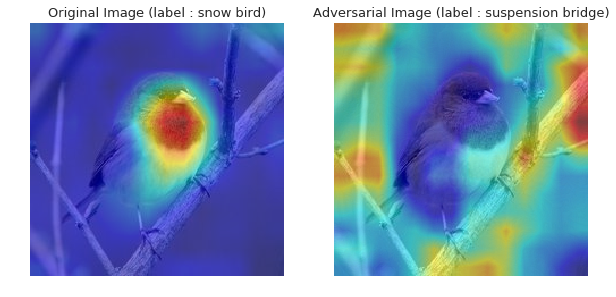

In [294]:
attention_map(cam[0], cam[1], labels[0], labels[1], save_path)

In [91]:
labels = read_labels('../data/labels.json')

## Augumentation

In [5]:
seq = iaa.Sequential([
    iaa.SomeOf(3, [
        iaa.Superpixels(p_replace=0.5, n_segments=100),
        iaa.GaussianBlur(0, 2.0),
        iaa.BilateralBlur(5, sigma_color=250, sigma_space=250),
        iaa.Sharpen(alpha=1),
        iaa.Emboss(alpha=1),
        iaa.AdditiveGaussianNoise(scale = 0.1 * 255),
    ])
],  random_order=True) # apply augmenters in random order

In [232]:
save_dir = '/home/lab/takato/Documents/course/ml_murata/report/develop/data/figs'

In [295]:
seq = iaa.Sequential([
        iaa.GaussianBlur(2.0),
        iaa.BilateralBlur(7, sigma_color=250, sigma_space=250),
        iaa.Sharpen(alpha=1),
        iaa.Emboss(alpha=1),
        iaa.Superpixels(p_replace=0.5, n_segments=100),
        iaa.AdditiveGaussianNoise(scale = 0.1 * 255)
],  random_order=True) # apply augmenters in random order

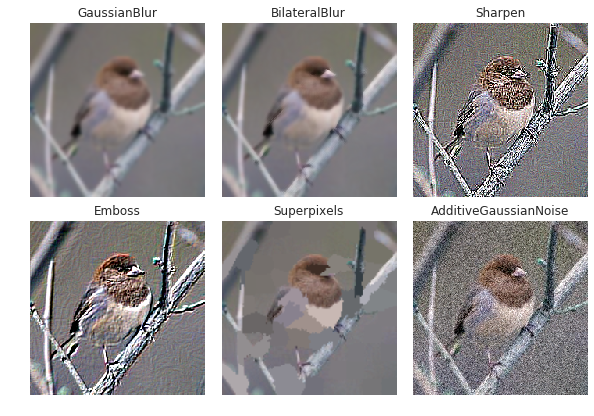

In [297]:
image = cv2.imread(adv_path, 1)
nrows  = 2
ncols = 3
title = ['GaussianBlur', 'BilateralBlur', 'Sharpen', 'Emboss', 'Superpixels', 'AdditiveGaussianNoise']
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(10, 10))
for i in range(6):
    row = int(i/ncols)
    col = 0 if (i % ncols) == 0 else col + 1
    iax = ax[row, col]
    
    iax.imshow(seq[i].augment_image(image))
    iax.axis("off")
    iax.set_title(title[i])
plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.65, wspace=0.1, hspace=0)
top = fig.subplotpars.top
wspace = fig.subplotpars.wspace
path = os.path.join(save_dir, 'filter.png')
plt.savefig(path, bbox_inches='tight')

In [142]:
image = cv2.imread(adv_path, 1)
img = seq.augment_image(image)

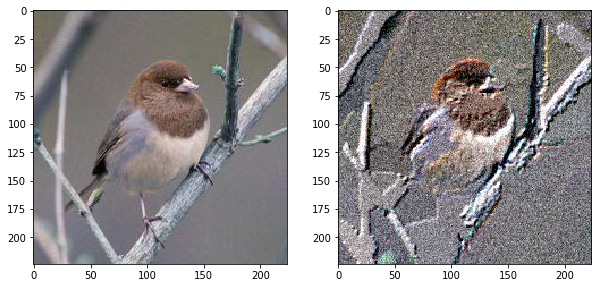

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image)
ax[1].imshow(img)

## Classify test

In [6]:
C = Classifier(filter_=False)
labels = read_labels('../data/labels.json')

Loading vgg16 ...


In [257]:
image = cv2.imread(noise_path, 1)
out, _ = C.forward(image)
_, label = out.data.max(1)
label = label.numpy()[0]
conf = nn.functional.softmax(out)[0][label].data.numpy()
pred = np.where(conf == max(conf))[0][0]

print(label, labels[str(label)], conf)

824 stole [0.42642805]


/home/lab/takato/.pyenv/versions/anaconda3-4.3.1/envs/ubuntu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [243]:
image = cv2.imread(org_path, 1)
out, _ = C.forward(image)
_, label = out.data.max(1)
label = label.numpy()[0]
conf = nn.functional.softmax(out)[0][label].data.numpy()
pred = np.where(conf == max(conf))[0][0]

print(label, labels[str(label)], conf)

13 junco, snowbird [0.9979706]


/home/lab/takato/.pyenv/versions/anaconda3-4.3.1/envs/ubuntu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [10]:
adv_path

'../data/output_images/org_13_adv_839_adv.png'

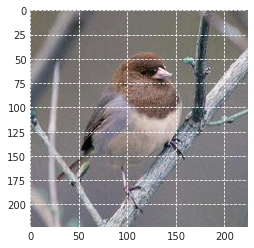

In [13]:
image = cv2.imread(adv_path, 1)
plt.imshow(image)

In [17]:
image = cv2.imread(adv_path, 1)
out, _ = C.forward(image)
_, label = out.data.max(1)
label = label.numpy()[0]
conf = nn.functional.softmax(out)[0].data.numpy()
pred = np.where(conf == max(conf))[0][0]

/home/lab/takato/.pyenv/versions/anaconda3-4.3.1/envs/ubuntu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """


In [18]:
pred

839

In [ ]:
def ensemble_classify():
    conf = np.zeros([1000])
    for _ in range(100):
        img = seq.augment_image(image)
        out, _ = C.forward(img)
        _, label = out.data.max(1)
        label = label.numpy()[0]
        conf += nn.functional.softmax(out)[0].data.numpy()
        pred = np.where(conf == max(conf))[0][0]
        print(f'pred {pred}')
    #     print(label, labels[str(label)], conf, conf_a)

In [19]:
image = cv2.imread(adv_path, 1)
conf = np.zeros([1000])
for i in range(100):
    img = seq.augment_image(image)
#     img = preprocess_image(img, False)
#     plt.imshow(img)
#     plt.show()
    out, _ = C.forward(img)
    _, label = out.data.max(1)
    label = label.numpy()[0]
    conf += nn.functional.softmax(out)[0].data.numpy()
    pred = np.where(conf == max(conf))[0][0]
    print(f'pred {pred}')
#     print(label, labels[str(label)], conf, conf_a)

TypeError: src is not a numpy array, neither a scalar

## RGB Histogram

In [235]:
def show_save(show, save, save_path):
    if save:
        plt.savefig(save_path, bbox_inches='tight')        
    else:
        pass
    
    if show:
        plt.show()

In [258]:
def make_rgb_histogram(org_image, adv_image, show=True, save=False, save_path=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(20, 5))
    fontsize = 20
    labelsize = 15
    color = ('r','g','b')
    histr_max_ = []
    for channel, col in enumerate(color):
        histr1 = cv2.calcHist([org_image], [channel], None, [256], [0,256])
        histr2 = cv2.calcHist([adv_image], [channel], None, [256], [0,256])
        histr_max_.extend([max(histr1), max(histr2)])
        # plot hist
        ax1.plot(histr1, color = col, label = col.upper())
        ax2.plot(histr2, color = col, label = col.upper())
        
    ax1.set_xlim([0,256])
    ax1.set_ylim(0, max(histr_max_) + 150)
    ax1.set_title('RGB Histogram (Original Image)', fontsize=fontsize)
    ax1.legend(fontsize = 18)
    ax1.tick_params(labelsize=labelsize)
    
    ax2.set_xlim([0,256])
    ax2.set_ylim(0, max(histr_max_) + 150)    
    ax2.set_title('RGB Histogram (Adversarial Image)', fontsize=fontsize) 
    ax2.legend(fontsize = 18)
    ax2.tick_params(labelsize=labelsize)
    
    show_save(show, save, save_path)    

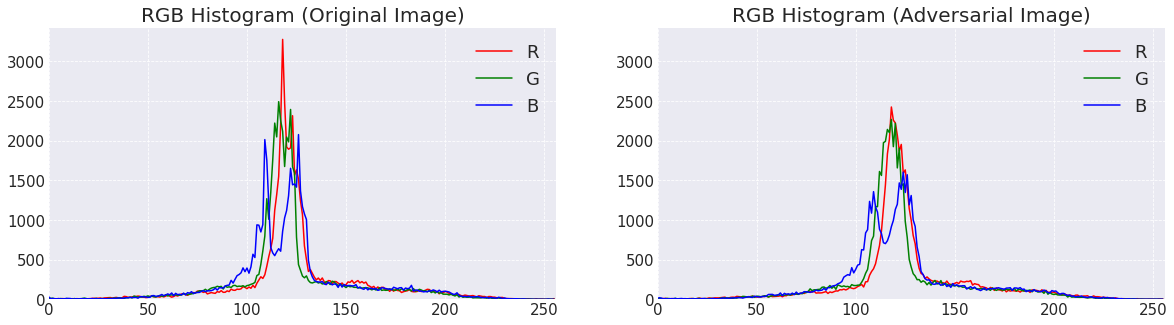

In [259]:
org_image = cv2.imread(org_path, 1)
adv_image = cv2.imread(adv_path, 1)
save_path = os.path.join(save_dir, 'rgb_hist.png')
make_rgb_histogram(org_image, adv_image, save=True, save_path=save_path)